<h1>LSTM - Processing</h1>

<h5>Importing Packages</h5>

In [ ]:
useKerasTfV1=True
useKerasTfV2=False
useTfV2=False

In [ ]:
try:
    from google.colab import drive
    drive.mount('/drive', force_remount=False)
    %run "/drive/My Drive/Colab Notebooks/Notebooks/Deep Learning/Deep Learning - Processing.ipynb"
except:
    %run "/Google Drive/Colab Notebooks/Notebooks/Deep Learning/Deep Learning - Processing.ipynb"

<h5>Models</h5>

In [ ]:
def model1(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timestep, n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 1"

def model2(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timestep, n_features), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 2"

def model3(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(Bidirectional(LSTM(100), input_shape=(n_timestep, n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 3"

def model4(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(n_timestep, n_features)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 4"

def model5(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(n_timestep, n_features)))
    model.add(Dropout(0.5))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(units=100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 5"

def model6(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(n_timestep, n_features)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=100)))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM 6"

In [ ]:
# https://ieeexplore.ieee.org/document/8513115
def bestModel(n_timestep, n_features, n_outputs):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(n_timestep, n_features)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(units=100))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model, "LSTM/LSTM Best Model"

In [ ]:
def parameters(input_shape, output_shape):
    
    return {
        "n_timestep": input_shape[1],
        "n_features": input_shape[2],
        "n_outputs": output_shape[1]
    }

<h5>Parameters</h5>

In [ ]:
datasets = getDataSets()

In [ ]:
# sides = ['left']
sides = ['left', 'right']
mode_label = False
# moving_window = True
moving_window = False
fields = experiment_by_fields[2]
subsets = getSubSets(datasets, fields, surface_type_labels)

In [ ]:
# (function, args, scaler name)
scalers = [
    # (getNormalizedDataRobust, None, "robust-scaler"),
    (getNormalizedDataMinMax, (-1,1), "min-max-scaler"),
    # (getNormalizedDataMinMax, (0,1), "min-max-scaler")
]

# (shape, window size)
input_shapes = [
    ((None, 100, 7), 100), 
    ((None, 150, 7), 150), 
    ((None, 200, 7), 200), 
    ((None, 250, 7), 250), 
    ((None, 300, 7), 300)
]

output_shape = (None, 3)

<h5>Training</h5>

In [ ]:
getLoadBar()

In [ ]:
run(testModel, patience=50)

In [ ]:
run(bestModel, patience=50)

In [ ]:
run(model1, patience=50)

In [ ]:
run(model2, patience=50)

In [ ]:
run(model3, patience=50)

In [ ]:
run(model4, patience=50)

In [ ]:
run(model5, patience=50)

In [ ]:
run(model6, patience=50)

<h5>Confusion Matrix - Best Model</h5>

In [ ]:
files = [
    'experiment-1-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.98538-val-acc-0.93598.hdf5',
    'experiment-2-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.98453-val-acc-0.91881.hdf5',
    'experiment-3-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.93026-val-acc-0.92700.hdf5'
]

0.9359780047132757
0.9188069594034797
0.9269983686786297


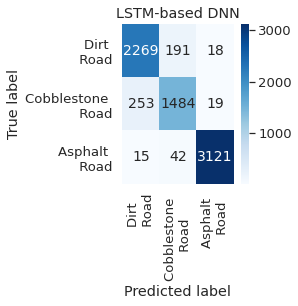

In [ ]:
confusionMatrix(files, "LSTM-based DNN", bestModel, (None, 300, 7), (None, 3), getNormalizedDataMinMax, (-1,1))

In [ ]:
classificationReport(files, bestModel, (None, 300, 7), (None, 3), getNormalizedDataMinMax, (-1,1))

{'accuracy': 0.927415002698327,
 'asphalt_road': {'f1-score': 0.9851641414141414,
  'precision': 0.9882837238758708,
  'recall': 0.9820641913152927,
  'support': 3178},
 'cobblestone_road': {'f1-score': 0.8545925712640369,
  'precision': 0.8642981945253349,
  'recall': 0.8451025056947609,
  'support': 1756},
 'dirt_road': {'f1-score': 0.9048853439680957,
  'precision': 0.8943634213638155,
  'recall': 0.9156577885391445,
  'support': 2478},
 'macro avg': {'f1-score': 0.914880685548758,
  'precision': 0.9156484465883404,
  'recall': 0.9142748285163993,
  'support': 7412},
 'weighted avg': {'f1-score': 0.9273909982335039,
  'precision': 0.9275102350517458,
  'recall': 0.927415002698327,
  'support': 7412}}